In [59]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '2ec0041c340c4cb59775b892ad94d29c'
client_secret = '263626ea764f417480f9b11a5a7d3053'

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [60]:
results = sp.search(q='a', type='artist', limit=50)  
artists = results['artists']['items']

for artist in artists:
    print(artist['name'])

Ariana Grande
Doja Cat
A$AP Rocky
Adele
A Boogie Wit da Hoodie
Paramore
Arctic Monkeys
André 3000
Cigarettes After Sex
Anuel AA
AJR
Akon
Selena Gomez
AC/DC
Rauw Alejandro
Alex G
Mariah Carey
Arcángel
The Neighbourhood
Anderson .Paak
Alicia Keys
Stray Kids
ABBA
Vicente Fernández
Alec Benjamin
Feid
Avicii
Avenged Sevenfold
Natanael Cano
Aventura
Alice In Chains
Lyrical Lemonade
Aaron May
Julión Álvarez y su Norteño Banda
Ava Max
Sam Smith
Alan Jackson
Guns N' Roses
Alfredo Olivas
Outkast
Aerosmith
Anitta
Kelly Clarkson
Andy Williams
Alan Walker
Evanescence
Anna Kendrick
Romeo Santos
Avril Lavigne
Chalino Sanchez


In [61]:
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'
playlist_info = sp.playlist(playlist_id)

total_tracks = playlist_info['tracks']['total']

results = sp.playlist_tracks(playlist_id, limit=total_tracks)

for track in results['items']:
    track_name = track['track']['name']
    artists = [artist['name'] for artist in track['track']['artists']]

    if len(artists) > 1:
        print(f"Utwór: {track_name}, Wykonawcy: {', '.join(artists)}")

Utwór: One Of The Girls (with JENNIE, Lily Rose Depp), Wykonawcy: The Weeknd, JENNIE, Lily-Rose Depp
Utwór: LUNA, Wykonawcy: Feid, ATL Jacob
Utwór: Igual Que Un Ángel (with Peso Pluma), Wykonawcy: Kali Uchis, Peso Pluma
Utwór: Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series), Wykonawcy: The Weeknd, Playboi Carti, Madonna
Utwór: Young Miko: Bzrp Music Sessions, Vol. 58, Wykonawcy: Bizarrap, Young Miko
Utwór: BELLAKEO, Wykonawcy: Peso Pluma, Anitta
Utwór: PERRO NEGRO, Wykonawcy: Bad Bunny, Feid
Utwór: Seven (feat. Latto) (Explicit Ver.), Wykonawcy: Jung Kook, Latto
Utwór: Que Onda, Wykonawcy: Calle 24, Chino Pacas, Fuerza Regida
Utwór: QLONA, Wykonawcy: KAROL G, Peso Pluma
Utwór: Starboy, Wykonawcy: The Weeknd, Daft Punk
Utwór: HARLEY QUINN, Wykonawcy: Fuerza Regida, Marshmello
Utwór: I Remember Everything (feat. Kacey Musgraves), Wykonawcy: Zach Bryan, Kacey Musgraves
Utwór: FIRST LOVE, Wykonawcy: Oscar Ortiz, Edgardo Nuñez
Utwór: Rich B

In [62]:
playlists = sp.featured_playlists(limit=50)

for playlist in playlists['playlists']['items']:
    playlist_id = playlist['id']
    playlist_info = sp.playlist_tracks(playlist_id)

    for track in playlist_info['items']:
        track_name = track['track']['name']
        artists = [artist['name'] for artist in track['track']['artists']]

        if len(artists) > 1:
            print(f"Utwór: {track_name}, Wykonawcy: {', '.join(artists)}")

Utwór: Jestem Twoją Bajką, Wykonawcy: Kleks, sanah
Utwór: Plaster, Wykonawcy: Szpaku, Deemz
Utwór: Dzięki, że jesteś, Wykonawcy: Lanberry, Tribbs
Utwór: Całkiem Nowa Bajka, Wykonawcy: Kleks, Igo, Kaśka Sochacka, Mrozu, Artur Rojek, Brodka, Ralph Kaminski, Bedoes 2115, Sokół
Utwór: Autumn Dance, Wykonawcy: L.U.C., Rebel Babel Film Orchestra
Utwór: Stan, Wykonawcy: Gibbs, Jonatan, 4Money
Utwór: Overdrive (feat. Norma Jean Martine), Wykonawcy: Ofenbach, Norma Jean Martine
Utwór: Nim Zajdzie Słońce, Wykonawcy: Smolasty, Doda, Filip Leon, WIKTOR
Utwór: Explosion Ech poleczko - DNSQ Remix, Wykonawcy: Kalwi & Remi, Guzowianki, DNSQ
Utwór: BFF, Wykonawcy: bambi, Young Leosia, PG$, @atutowy
Utwór: MONEY ON THE DASH - SPED UP, Wykonawcy: Elley Duhé, Whethan
Utwór: LET'S GET FKD UP, Wykonawcy: Alok, Mondello'G, CERES, Tribbs
Utwór: PASEK PLAYBOYA, Wykonawcy: MIÜ, DJ VaZee
Utwór: Kevin sam w domu, Wykonawcy: Blacha 2115, Venom Valentino, francis
Utwór: NIE MA CIĘ, Wykonawcy: Fukaj, charlie moncler

In [63]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def get_all_featured_playlists(sp, total_limit=10000, page_limit=50):
    playlists = []
    offset = 0
    while len(playlists) < total_limit:
        limit = min(total_limit - len(playlists), page_limit)
        result = sp.featured_playlists(limit=limit, offset=offset)
        playlists.extend(result['playlists']['items'])
        offset += limit
        if not result['playlists']['next']:
            break  

    return playlists

client_id = '2ec0041c340c4cb59775b892ad94d29c'
client_secret = '263626ea764f417480f9b11a5a7d3053'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

featured_playlists = get_all_featured_playlists(sp, total_limit=10000, page_limit=50)

print(len(featured_playlists))

collaborations = {}

for playlist in featured_playlists:
    playlist_id = playlist['id']
    playlist_info = sp.playlist_tracks(playlist_id)

    for track in playlist_info['items']:
        artists = [artist['name'] for artist in track['track']['artists']]

        for artist in artists:
            if artist not in collaborations:
                collaborations[artist] = set()
            collaborations[artist].update(set(artists) - {artist})

k = 1
for artist, collaborators in collaborations.items():
    if collaborators:
        print(f"{k} Artysta: {artist}, Współpracownicy: {', '.join(collaborators)}")
        k+=1



100
1 Artysta: Kleks, Współpracownicy: Bedoes 2115, sanah, Brodka, Marissa, Igo, Mrozu, Kaśka Sochacka, Sokół, Ralph Kaminski, Artur Rojek, Carla Fernandes, Oskar Cyms
2 Artysta: sanah, Współpracownicy: Daria Zawiałow, Dawid Podsiadło, Artur Rojek, Igor Herbut, Kleks, Skytech, Grzegorz Turnau, Maro Music, Vito Bambino, Kwiat Jabłoni, Sobel
3 Artysta: Szpaku, Współpracownicy: PRO8L3M, Worek, Raff J.R., Fukaj, White 2115, Jonatan, SB Maffija, D3W, Guzior, LEEO, Kaptur, 4Money, 27.Fuckdemons, Gibbs, Kaz Bałagane, Lucassi, Białas, Jan-Rapowanie, Kubi Producent, po prostu Kajtek, Piotrek Lewandowski, PSR, Mjonszu, Deemz, Young Multi, Chivas, Oki, Waima, Nocny
4 Artysta: Deemz, Współpracownicy: Bedoes 2115, GOMBAO 33, Szpaku, Janusz Walczuk, Quebonafide, Magiera, Young Leosia, Klaudia Szafrańska, Białas, Pezet, PSR, bambi, Mjonszu, PlanBe, Waima, Oki, francis, Phatrax, Sobel
5 Artysta: Vixen, Współpracownicy: Czarli, Ramzes
6 Artysta: Lanberry, Współpracownicy: Tribbs
7 Artysta: Tribbs, Wspó

In [64]:
import networkx as nx
from pyvis.network import Network
import pyvis
import matplotlib.pyplot as plt

G = nx.Graph()
for artist, collaborators in collaborations.items():
    if collaborators:
        print(artist, collaborators)
        G.add_node(artist)
        for i in collaborators:
            G.add_edge(artist, i)

pv = Network()
pv.from_nx(G)

print("Nodess: ", pv.nodes)
print("Edges: ", pv.edges)

pv.show_buttons()

pv.show("graph.html")

Kleks {'Bedoes 2115', 'sanah', 'Brodka', 'Marissa', 'Igo', 'Mrozu', 'Kaśka Sochacka', 'Sokół', 'Ralph Kaminski', 'Artur Rojek', 'Carla Fernandes', 'Oskar Cyms'}
sanah {'Daria Zawiałow', 'Dawid Podsiadło', 'Artur Rojek', 'Igor Herbut', 'Kleks', 'Skytech', 'Grzegorz Turnau', 'Maro Music', 'Vito Bambino', 'Kwiat Jabłoni', 'Sobel'}
Szpaku {'PRO8L3M', 'Worek', 'Raff J.R.', 'Fukaj', 'White 2115', 'Jonatan', 'SB Maffija', 'D3W', 'Guzior', 'LEEO', 'Kaptur', '4Money', '27.Fuckdemons', 'Gibbs', 'Kaz Bałagane', 'Lucassi', 'Białas', 'Jan-Rapowanie', 'Kubi Producent', 'po prostu Kajtek', 'Piotrek Lewandowski', 'PSR', 'Mjonszu', 'Deemz', 'Young Multi', 'Chivas', 'Oki', 'Waima', 'Nocny'}
Deemz {'Bedoes 2115', 'GOMBAO 33', 'Szpaku', 'Janusz Walczuk', 'Quebonafide', 'Magiera', 'Young Leosia', 'Klaudia Szafrańska', 'Białas', 'Pezet', 'PSR', 'bambi', 'Mjonszu', 'PlanBe', 'Waima', 'Oki', 'francis', 'Phatrax', 'Sobel'}
Vixen {'Czarli', 'Ramzes'}
Lanberry {'Tribbs'}
Tribbs {'Bertie Scott', 'Pedro', 'Lanberr

In [65]:
# Oblicz stopnie węzłów
degrees = G.degree()

# Znajdź węzeł o największym stopniu
node_with_max_degree = max(degrees, key=lambda x: x[1])

# Wydrukuj wyniki
print("Węzeł o największym stopniu:", node_with_max_degree[0])

Węzeł o największym stopniu: White 2115


In [66]:
# Analiza centralności pośrednictwa
betweenness_centrality = nx.betweenness_centrality(G)

# Przykładowe wyświetlenie centralności pośrednictwa
print("Centralność pośrednictwa:", betweenness_centrality)


Centralność pośrednictwa: {'Kleks': 0.0017220233498465136, 'Bedoes 2115': 0.031704192085702104, 'sanah': 0.0026016879086625685, 'Brodka': 0.0022699209548488366, 'Marissa': 0.0, 'Igo': 0.0033573509601252448, 'Mrozu': 0.0008124542471785964, 'Kaśka Sochacka': 0.0010481180738438059, 'Sokół': 0.01170673106748122, 'Ralph Kaminski': 0.0014669413764168662, 'Artur Rojek': 0.0006893777182297445, 'Carla Fernandes': 0.0, 'Oskar Cyms': 1.5786902971111844e-05, 'Daria Zawiałow': 0.0006593307122573543, 'Dawid Podsiadło': 0.0017381470275981798, 'Igor Herbut': 2.0916806297417875e-05, 'Skytech': 8.431333082918529e-05, 'Grzegorz Turnau': 0.0, 'Maro Music': 0.00022008183125720352, 'Vito Bambino': 0.00021548589731698454, 'Kwiat Jabłoni': 0.0009422945715657135, 'Sobel': 0.002501860774560989, 'Szpaku': 0.018408075198814915, 'PRO8L3M': 0.003336163728623841, 'Worek': 0.0010395844961630278, 'Raff J.R.': 0.0, 'Fukaj': 0.0016009498283152631, 'White 2115': 0.008914658273790356, 'Jonatan': 0.004803801879538124, 'SB 

['White 2115', 'Bedoes 2115', 'SB Maffija', 'Sokół', '@atutowy', 'Malik Montana', 'Oki', 'Mata', 'Szpaku', 'Taco Hemingway']


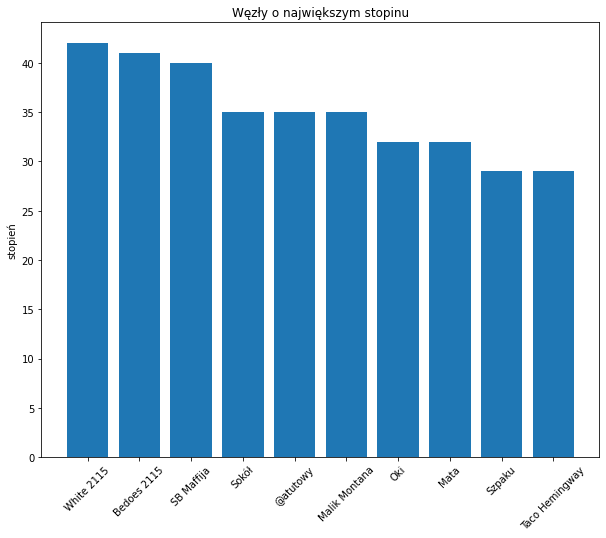

Top 10 wierzchołków o największym stopniu:
Wierzchołek White 2115, Stopień: 42
Wierzchołek Bedoes 2115, Stopień: 41
Wierzchołek SB Maffija, Stopień: 40
Wierzchołek Sokół, Stopień: 35
Wierzchołek @atutowy, Stopień: 35
Wierzchołek Malik Montana, Stopień: 35
Wierzchołek Oki, Stopień: 32
Wierzchołek Mata, Stopień: 32
Wierzchołek Szpaku, Stopień: 29
Wierzchołek Taco Hemingway, Stopień: 29


In [67]:
def top_nodes_by_degree(graph, k=10):
    degrees = dict(graph.degree())
    top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:k]
    return top_nodes

top_nodes = top_nodes_by_degree(G, k=10)
d = []
print(top_nodes)
for i in top_nodes:
    d.append(G.degree[i])


fig, ax = plt.subplots(figsize=(10,8))
ax.bar(top_nodes, d)
plt.title("Węzły o największym stopinu")
plt.ylabel("stopień")
plt.xticks(rotation=45)
plt.show()

print("Top 10 wierzchołków o największym stopniu:")
for node in top_nodes:
    print(f"Wierzchołek {node}, Stopień: {G.degree[node]}")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

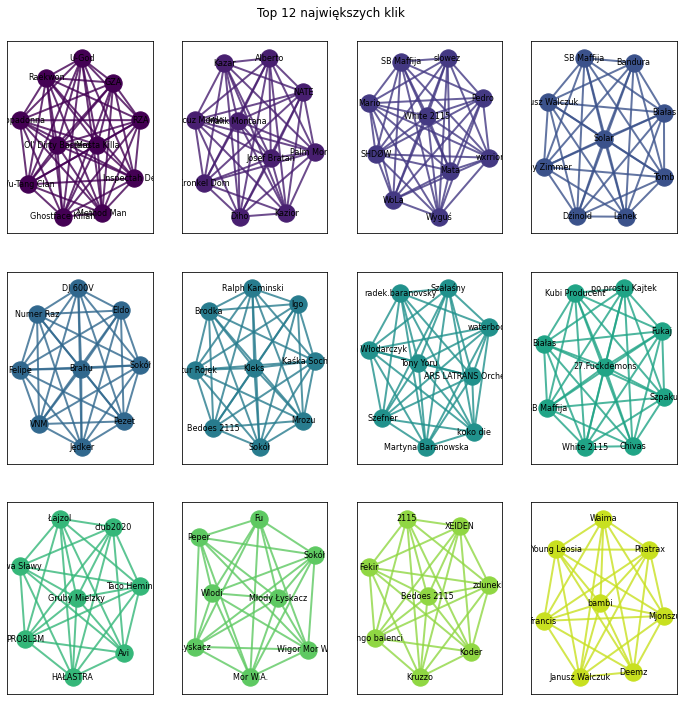

In [68]:

def find_top_k_cliques(graph, k=10):
    cliques = list(nx.find_cliques(graph))
    sorted_cliques = sorted(cliques, key=len, reverse=True)
    top_k_cliques = sorted_cliques[:k]
    return top_k_cliques

def draw_cliques_mosaic(graph, top_k_cliques):
    plt.figure(figsize=(12, 12))

    rows = 3
    cols = 4 

    for i, clique in enumerate(top_k_cliques):
        subgraph = graph.subgraph(clique)
        pos = nx.spring_layout(subgraph)
        
        plt.subplot(rows, cols, i+1)
        nx.draw_networkx_nodes(subgraph, pos, node_size=300, node_color=plt.cm.viridis(i / len(top_k_cliques)))
        nx.draw_networkx_edges(subgraph, pos, width=2.0, alpha=0.8, edge_color=plt.cm.viridis(i / len(top_k_cliques)))
        nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='black')


    plt.suptitle("Top 12 największych klik", y=0.92)
    plt.show()

top_10_cliques = find_top_k_cliques(G, k=12)

draw_cliques_mosaic(G, top_10_cliques)


{'Kleks': 0.08021135795130575, 'Bedoes 2115': 0.09286609388877584, 'sanah': 0.07336267567433687, 'Brodka': 0.08085349944052267, 'Marissa': 0.06939210655936853, 'Igo': 0.08009975177633524, 'Mrozu': 0.07998845574774509, 'Kaśka Sochacka': 0.07996623364585656, 'Sokół': 0.08266469213333162, 'Ralph Kaminski': 0.07995512722451686, 'Artur Rojek': 0.08049173881662772, 'Carla Fernandes': 0.06945908735720577, 'Oskar Cyms': 0.070290221735839, 'Daria Zawiałow': 0.07411831028923926, 'Dawid Podsiadło': 0.07444418932064158, 'Igor Herbut': 0.06426400044837256, 'Skytech': 0.0663222253475255, 'Grzegorz Turnau': 0.06420666027398186, 'Maro Music': 0.07243952636422818, 'Vito Bambino': 0.07282440430316527, 'Kwiat Jabłoni': 0.06424965580541533, 'Sobel': 0.08251066590461822, 'Szpaku': 0.08453405521534822, 'PRO8L3M': 0.0761276006369375, 'Worek': 0.07524204888465841, 'Raff J.R.': 0.07261313269633216, 'Fukaj': 0.08952984696991002, 'White 2115': 0.09218205220440694, 'Jonatan': 0.07462754939285993, 'SB Maffija': 0.

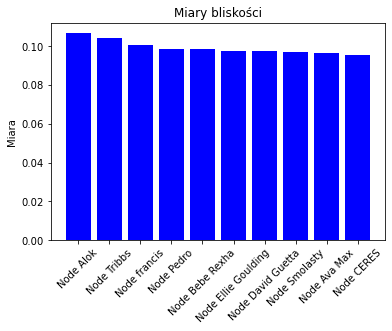

In [74]:
closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)
top_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]
print(top_nodes)
node_labels = [f"Node {node}" for node in top_nodes]
closeness_values = [closeness_centrality[node] for node in top_nodes]

plt.bar(node_labels, closeness_values, color='blue')
plt.xticks(rotation=45)
plt.title("Miary bliskości")
plt.ylabel("Miara")
plt.show()